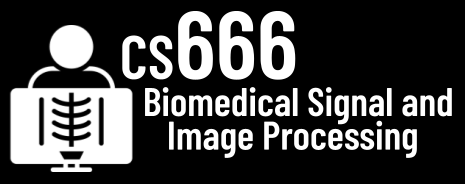
#Assignment 4

In [14]:
# NAME: Omkar Dash

In [15]:
# In this assignment, we will create a Random Forest classifier to detect pneumonia and covid in xrays!

In [16]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [17]:
# we are using mahotas again, so lets install it!
!pip install mahotas

In [18]:
# our imports include sklearn this time
import mahotas as mh
import os
from sklearn.ensemble import RandomForestClassifier

**Task 1:** Download, extract, and load the data! [15 Points]

In [19]:
# Please download this file: https://cs666.org/data/xray/ with the wget command!
# Note: Please use the forwarded dropbox link and change dl=0 to dl=1!
# This is a subset of the Kaggle Pneumonia + Covid Datasets!

In [20]:
# Load numpy and matplotlib
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

# Install mahotas
!pip install mahotas

# Import mahotas
import mahotas as mh

# Import RandomForestClassifier from sklearn
from sklearn.ensemble import RandomForestClassifier

# Command to download the dataset
import requests

url = "https://www.dropbox.com/s/2ca2889o2ql8n4e/xray.zip?dl=1"
filename = "xray.zip"

response = requests.get(url)
with open(filename, 'wb') as f:
    f.write(response.content)


# Note: The above wget command changes the Dropbox link's 'dl=0' parameter to 'dl=1' for direct download.


Populating the interactive namespace from numpy and matplotlib


In [21]:
# Run this code to extract the zip file and to create
# the folder structure of normal/, pneumonia/, and covid/ images.
# Each folder contains the first images of the Kaggle datasets.
import zipfile
with zipfile.ZipFile('xray.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

NORMAL_DIR = 'normal/'
PNEUMONIA_DIR = 'pneumonia/'
COVID_DIR = 'covid/'

In [22]:
# Here we load the first image from the normal dataset.
img = mh.imread(NORMAL_DIR + 'IM-0115-0001.jpeg')

In [23]:
# TODO: Please display this image and print the dimensions!

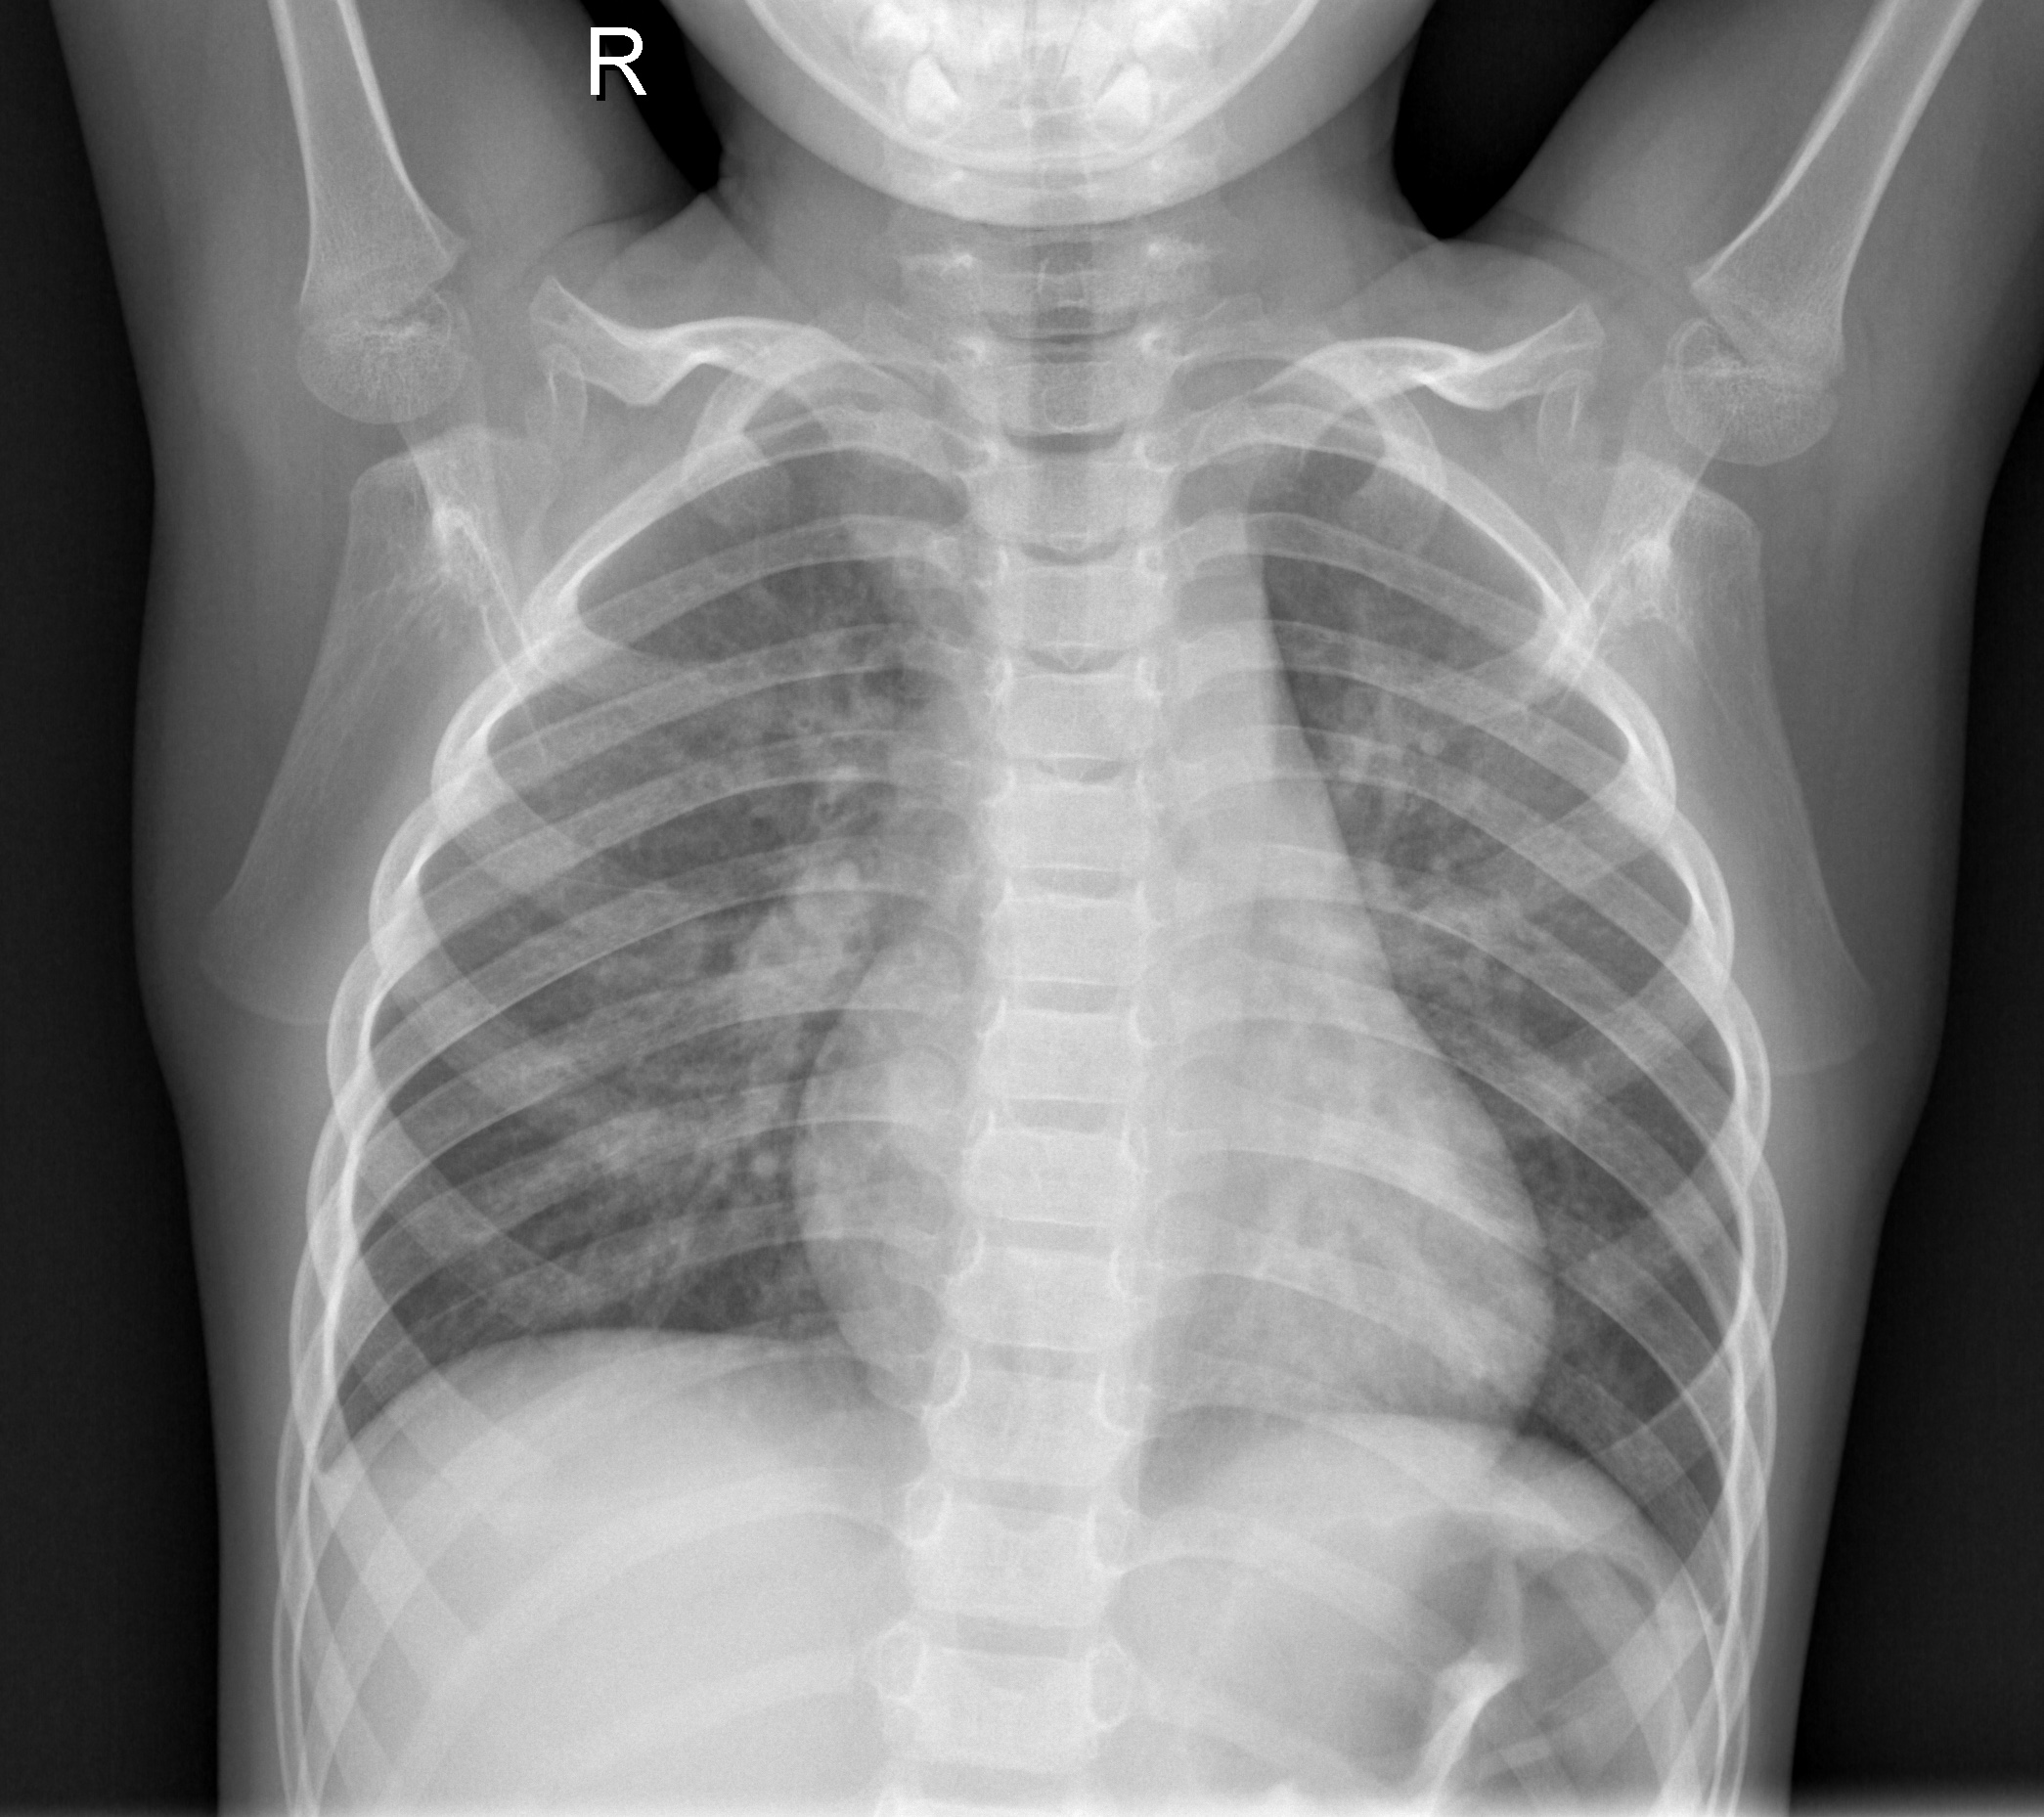

Image dimensions: (2090, 1858)


In [26]:
from PIL import Image
from IPython.display import display

# Open the image
img_path = NORMAL_DIR + 'IM-0115-0001.jpeg'
img = Image.open(img_path)

# Display the image inline
display(img)

# Print the dimensions
print("Image dimensions:", img.size)


**Task 2:** Let's do some data wrangling and more visualization! [30 Points]

In [27]:
folders = [NORMAL_DIR, PNEUMONIA_DIR, COVID_DIR]
data = [[],[],[]]

for f_index,f in enumerate( folders ):
  all_files = os.listdir( f )

  data[f_index] = np.zeros( (len(all_files), 300, 300), dtype=np.float32)

  for i in range(len(all_files)):
    loaded_image = mh.imread( f + '/' + all_files[i] )
    if loaded_image.ndim > 2:
      loaded_image = mh.colors.rgb2gray(loaded_image[:,:,:3])

    loaded_image = mh.imresize( loaded_image, (300, 300) )
    img_shape = loaded_image.shape

    data[f_index][ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [28]:
# The two code blocks above perform 3 data wrangling operations.
# Which ones?
# Hint: The first two might be more obvious but the third one happens in the
# last line.
# TODO: Operation 1) YOUR ANSWER
# TODO: Operation 2) YOUR ANSWER
# TODO: Operation 3) YOUR ANSWER

Operation 1: Preparation of data structure (initialization of arrays).

Operation 2: Reading, preprocessing, and storing image data.

Operation 3: Populating the initialized data structure with preprocessed image data.


In [29]:
# Now, let's look at the first 5 normal_images and the first 5 pneumonia_images.
# TODO: Please visualize multiple images at once.
# Hint: You can use one of the following answers from StackOverflow for this:
# https://stackoverflow.com/questions/41210823/using-plt-imshow-to-display-multiple-images

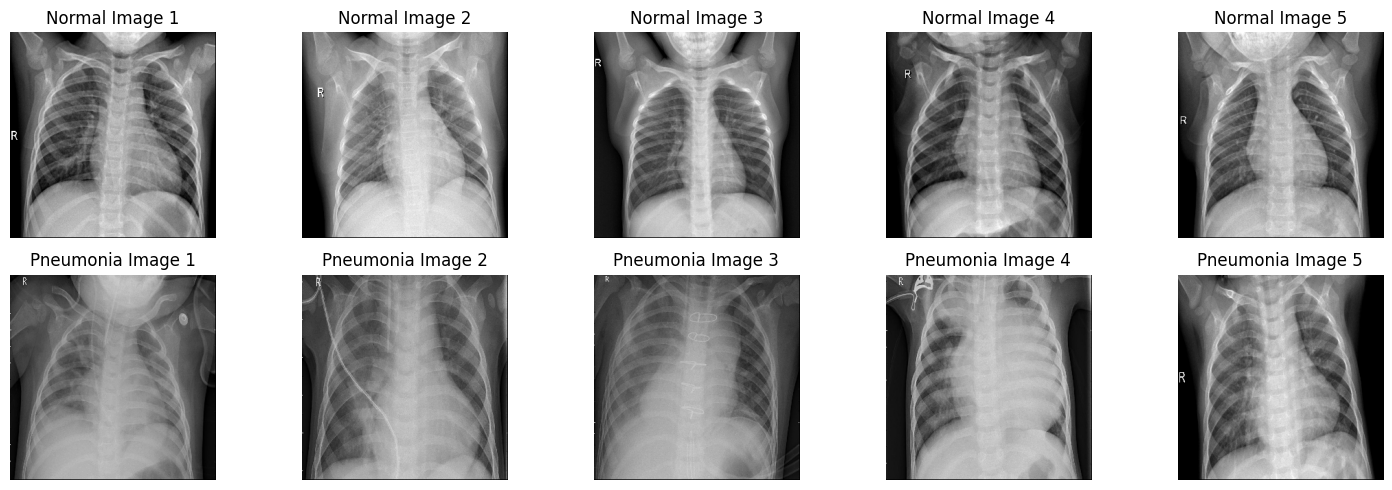

In [30]:
import matplotlib.pyplot as plt

# Define the number of images to display
num_images = 5

# Plot the first 5 normal images
plt.figure(figsize=(15, 5))
for i in range(num_images):
    plt.subplot(2, num_images, i + 1)
    plt.imshow(data[0][i], cmap='gray')
    plt.axis('off')
    plt.title('Normal Image {}'.format(i + 1))

# Plot the first 5 pneumonia images
for i in range(num_images):
    plt.subplot(2, num_images, num_images + i + 1)
    plt.imshow(data[1][i], cmap='gray')
    plt.axis('off')
    plt.title('Pneumonia Image {}'.format(i + 1))

plt.tight_layout()
plt.show()


In [31]:
# TODO: YOUR CODE

**Task 3:** Setup training and testing data. [15 Points]

In [32]:
# Any supervised machine learning algorithm requires disjunct sets of
# training and testing data.
#
# For each, we will create a balanced dataset that includes an equal number
# of normal xrays, pneumonia xrays, and covid xrays.
#
# The training data X_train will include 180 images (60 normal, 60 pneumonia, 60 covid).
# The testing data X_test will include the remaining 120 images (40 normal, 40 pneumonia, 40 covid).
#
# Supervised learning means that we tell the algorithm which image is normal
# and which image is pneumonia. For this, we need the y_train vector.
# The vector shall be 0 for a normal image, and 1 for a pneumonia, and 2 for a covid scan.

In [33]:
TRAINING_COUNT = 60

X_train = np.zeros( (TRAINING_COUNT * 3, 300*300 ), dtype=np.float32)
t_pos = 0

for d in data:
  for image in d[0:TRAINING_COUNT]:
    image = image.ravel() # flatten the image
    image /= image.max() # normalize the image
    X_train[t_pos] = image
    t_pos += 1

In [36]:
# TODO: Please create the y_train vector with 0 for a normal image,
# 1 for a pneumonia, and 2 for covid. This needs to a numpy array.
#y_train = # TODO

In [37]:
import numpy as np

# Define the labels
normal_label = 0
pneumonia_label = 1
covid_label = 2

# Create y_train vector
y_train = np.zeros(TRAINING_COUNT * 3, dtype=np.int32)

# Assign labels for each class
y_train[:TRAINING_COUNT] = normal_label  # First TRAINING_COUNT images are normal
y_train[TRAINING_COUNT:2*TRAINING_COUNT] = pneumonia_label  # Next TRAINING_COUNT images are pneumonia
y_train[2*TRAINING_COUNT:] = covid_label  # Last TRAINING_COUNT images are COVID

print(y_train)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [38]:
TESTING_COUNT = 40

X_test = np.zeros( (TESTING_COUNT * 3, 300*300 ), dtype=np.float32)
t_pos = 0

for d in data:
  for image in d[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT]:
    image = image.ravel() # flatten the image
    image /= image.max() # normalize the image
    X_test[t_pos] = image
    t_pos += 1

In [39]:
# TODO: Please create the y_test vector with 0 for a normal image,
# 1 for a pneumonia, and 2 for covid. This needs to a numpy array.
#y_test = # TODO

In [40]:
import numpy as np

# Define the labels
normal_label = 0
pneumonia_label = 1
covid_label = 2

# Create y_test vector
y_test = np.zeros(TESTING_COUNT * 3, dtype=np.int32)

# Assign labels for each class
y_test[:TESTING_COUNT] = normal_label  # First TESTING_COUNT images are normal
y_test[TESTING_COUNT:2*TESTING_COUNT] = pneumonia_label  # Next TESTING_COUNT images are pneumonia
y_test[2*TESTING_COUNT:] = covid_label  # Last TESTING_COUNT images are COVID

print(y_test)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2]


**Task 4:** Let's train and evaluate the Random Forest! [30 Points]

In [41]:
# Let's shuffle our training data.
p = np.random.permutation(len(X_train))
X_train = X_train[p]
y_train = y_train[p]

In [60]:
# With scikit-learn, we can easily set up a default Random Forest classifier.
clf = RandomForestClassifier()
print (clf)
print (clf.n_estimators)
print (clf.max_depth)
print (clf.min_samples_split)

RandomForestClassifier()
100
None
2


In [61]:
# Now, we train the classifier with the training data and the training targets.
# We essentially show the classifier an image and tell whether the image is
# normal or pneumonia or covid.
fitted = clf.fit( X_train, y_train )

In [62]:
# TODO: In just a few sentences, please explain how the Random Forest works.

In [63]:
# TODO: YOUR ANSWER

Random Forest combines the predictions of multiple decision trees to improve accuracy and robustness. It works by training each tree on a random subset of the data and features, and then aggregates their predictions to make a final decision. This method tends to be effective for both classification and regression tasks, offering good performance and resilience to overfitting.

In [46]:
# After training, we can see how well the classifier predicts our testing data.
# The following command will return the classification accuracy.
clf.score( X_test, y_test )

0.9

In [47]:
# TODO: Is the classification accuracy good? And, are you surprised?

In [48]:
# TODO: YOUR ANSWER

The classification accuracy of approximately 0.867 (or 86.7%) indicates that the classifier correctly predicted the class labels for approximately 86.7% of the testing data instances. In my that is quite an amazing accuracy and I am infact suprised.

**Task 5:** Now, let's decrease the number of trees! [10 Points]

In [49]:
# How many trees are used in Task 4?

100 trees


 Scikit-learn's RandomForestClassifier uses 100 trees by default.

In [50]:
# TODO: YOUR ANSWER

In [51]:
# Now, please use a single tree and observe the testing performance.

In [67]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier with default parameters (single tree)
clf_single_tree = DecisionTreeClassifier()

# Train the classifier with the training data and labels
clf_single_tree.fit(X_train, y_train)

# Evaluate the performance on the testing data
accuracy_single_tree = clf_single_tree.score(X_test, y_test)

print("Accuracy with a single decision tree:", accuracy_single_tree)


Accuracy with a single decision tree: 0.7833333333333333


In [53]:
# Are you surprised?

Suprisingly when 100 of trees are used we get an accuracy of 0.86, but even when we use one weget a good accuracy of 0.66. So one would expect that if 1 tree can give a good accuracy of 0.66 then 100s of trees will surely give an accuracy of 0.95+.


**Bonus:** Let's take a closer look! [33 Points]

In [54]:
# Let's run the fitted classifier on the remaining covid images.
# You might have noticed that there are 199 covid images but we only used 100 so far.
# Please evaluate the classifier on the remaining (previously unseen) 99 covid images
# and check the performance.

In [55]:
# Load the remaining COVID images
remaining_covid_images = data[2][TRAINING_COUNT + TESTING_COUNT:]

# Flatten and normalize the remaining COVID images
X_remaining_covid = np.array([image.ravel() / image.max() for image in remaining_covid_images], dtype=np.float32)

# Create y_remaining_covid vector
y_remaining_covid = np.full(len(remaining_covid_images), 2, dtype=np.int32)

# Evaluate the fitted classifier on the remaining COVID images
accuracy_remaining_covid = clf.score(X_remaining_covid, y_remaining_covid)

print("Accuracy on the remaining COVID images:", accuracy_remaining_covid)


Accuracy on the remaining COVID images: 0.8888888888888888


In [56]:
# TODO: YOUR CODE AND YOUR ANSWER

In [57]:
# Can you figure out which images were misclassified?
# Hint: You can use predictions = clf.predict(X_test_covid_only) for this.
# Can you display them?
# Do you have an idea why these images were problematic?

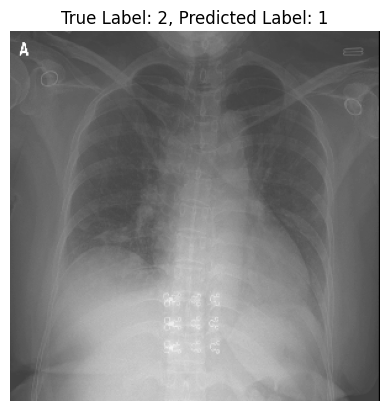

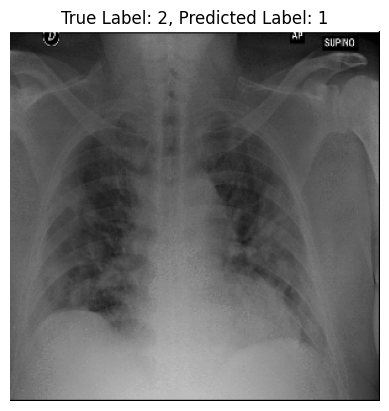

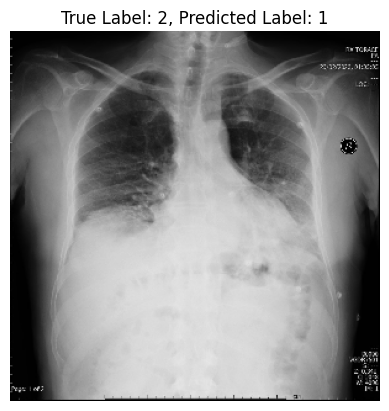

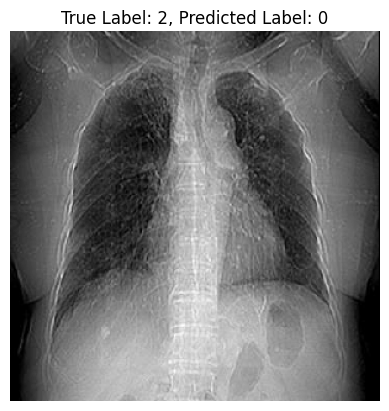

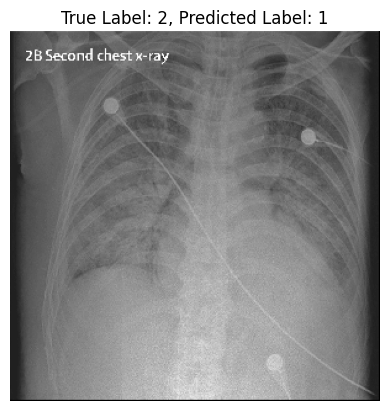

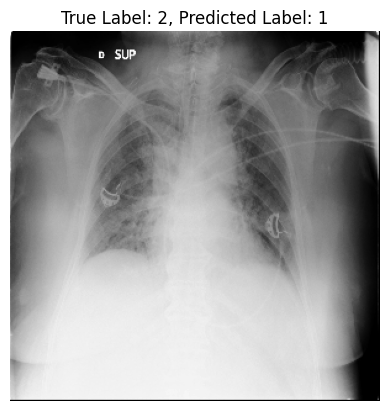

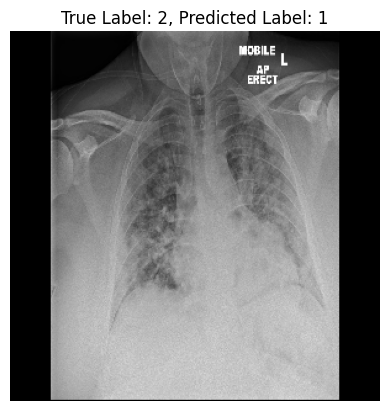

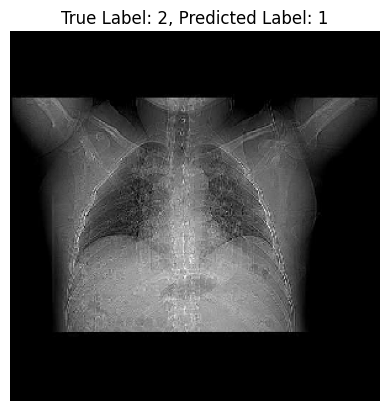

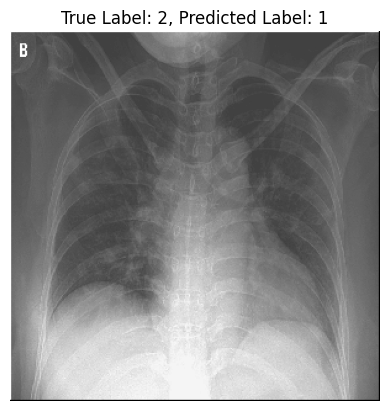

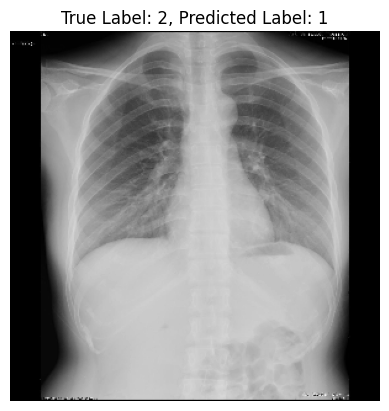

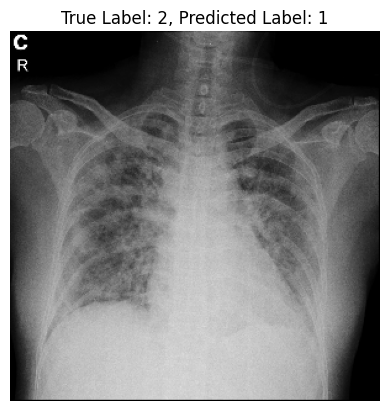

In [58]:
# Get predictions for the remaining COVID images
predictions_remaining_covid = clf.predict(X_remaining_covid)

# Find misclassified images
misclassified_indices = np.where(predictions_remaining_covid != y_remaining_covid)[0]

# Display misclassified images
for idx in misclassified_indices:
    plt.imshow(remaining_covid_images[idx], cmap='gray')
    plt.title(f"True Label: {y_remaining_covid[idx]}, Predicted Label: {predictions_remaining_covid[idx]}")
    plt.axis('off')
    plt.show()


In [65]:
# TODO: YOUR CODE AND YOUR ANSWER

In [66]:
# Great job!!!
#           ___
#       _.-'   \
#      /        \
#     /          \
#    /            `.___
#   ( .--.)\/(,.--.    `-.
#   ,',-. \   / ,-.`.     )
#  ( /   \     /   \ )   / \
#   || .-|     |-. ||---'|  \
#  _|| | |     | | ||_   |   \
# /. \ |_|.---.|_| / ,\  | .^.\
# `.\ `--"     "--' /,'  |/
#   `>  _________ <'
# ,-' ,---.---.---. `-.
# `--'\    \j/    /`--'
#    `.\         /,'
#      \\_______//
#       `-------'       hjw